# Question 1
#### Introduction:
#### Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.
#### Occupations

In [1]:
# Step 1. Import the necessary libraries
import pandas as pd

# Step 2. Import the dataset from this address.
df1 = pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', "|")

# Step 3. Assign it to a variable called users
#Setting the index of the Data Frame to "user_id"
users = df1.set_index(['user_id'])
users.head()

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [2]:
# Step 4. Discover what is the mean age per occupation

users.groupby('occupation').mean(['age'])

,age
occupation,
administrator,38.746835
artist,31.392857
doctor,43.571429
educator,42.010526
engineer,36.388060
entertainment,29.222222
executive,38.718750
healthcare,41.562500
homemaker,32.571429


In [4]:
# Step 5. Discover the Male ratio per occupation and sort it from the most to the least

users['male'] = users.gender.apply(lambda x: True if x=='M' else False)
(users.groupby('occupation').male.sum() / users.groupby('occupation').gender.count()).sort_values(ascending = False).round(2)

occupation
doctor           1.00
engineer         0.97
technician       0.96
retired          0.93
programmer       0.91
executive        0.91
scientist        0.90
entertainment    0.89
lawyer           0.83
salesman         0.75
educator         0.73
student          0.69
other            0.66
marketing        0.62
writer           0.58
none             0.56
administrator    0.54
artist           0.54
librarian        0.43
healthcare       0.31
homemaker        0.14
dtype: float64

In [6]:
# Step 5. Discover the Male ratio per occupation and sort it from the most to the least

maleRatio = pd.pivot_table(users, aggfunc = 'count', index = 'occupation', values = 'age', columns = 'gender', fill_value = 0)

#Determining the total number of individuals of each occupation
total = maleRatio[['M','F']].sum(axis = 1)

maleRatio['maleRatio'] = (maleRatio['M'] / total)

maleRatio.sort_values(by = ['maleRatio'], ascending = False)

gender,F,M,maleRatio
occupation,,,
doctor,0,7,1.000000
engineer,2,65,0.970149
technician,1,26,0.962963
retired,1,13,0.928571
programmer,6,60,0.909091
executive,3,29,0.906250
scientist,3,28,0.903226
entertainment,2,16,0.888889
lawyer,2,10,0.833333


In [7]:
# Step 6. For each occupation, calculate the minimum and maximum ages

users.groupby('occupation').agg({'age':['min','max']})

age    
              min max
occupation           
administrator  21  70
artist         19  48
doctor         28  64
educator       23  63
engineer       22  70
entertainment  15  50
executive      22  69
healthcare     22  62
homemaker      20  50
lawyer         21  53
librarian      23  69
marketing      24  55
none           11  55
other          13  64
programmer     20  63
retired        51  73
salesman       18  66
scientist      23  55
student         7  42
technician     21  55
writer         18  60

In [15]:
# Step 7. For each combination of occupation and sex, calculate the mean age

users.groupby(['occupation','gender']).agg({'age': ['mean']})

age
                           mean
occupation    gender           
administrator F       40.638889
              M       37.162791
artist        F       30.307692
              M       32.333333
doctor        M       43.571429
educator      F       39.115385
              M       43.101449
engineer      F       29.500000
              M       36.600000
entertainment F       31.000000
              M       29.000000
executive     F       44.000000
              M       38.172414
healthcare    F       39.818182
              M       45.400000
homemaker     F       34.166667
              M       23.000000
lawyer        F       39.500000
              M       36.200000
librarian     F       40.000000
              M       40.000000
marketing     F       37.200000
              M       37.875000
none          F       36.500000
              M       18.600000
other         F       35.472222
              M       34.028986
programmer    F       32.166667
              M       33.216667
retired       F       70.000000
              M       62.538462
salesman      F       27.000000
              M       38.555556
scientist     F       28.333333
              M       36.321429
student       F       20.750000
              M       22.669118
technician    F       38.000000
              M       32.961538
writer        F       37.631579
              M       35.346154

In [17]:
# Step 8. For each occupation present the percentage of women and men
users.groupby('occupation')['gender'].value_counts(normalize=True) \
    .mul(100) \
    .reset_index(name='Percentage')

,occupation,gender,Percentage
0,administrator,M,54.430380
1,administrator,F,45.569620
2,artist,M,53.571429
3,artist,F,46.428571
4,doctor,M,100.000000
5,educator,M,72.631579
6,educator,F,27.368421
7,engineer,M,97.014925
8,engineer,F,2.985075
9,entertainment,M,88.888889


# Question 2
#### Euro Teams

In [18]:
# Step 1. Import the necessary libraries
import pandas as pd
import numpy as np

# Step 2. Import the dataset from this address
# Step 3. Assign it to a variable called euro12
euro12 = pd.read_csv(r'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')

euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [19]:
# Step 4. Select only the Goal column

euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [20]:
# Step 5. How many team participated in the Euro2012?

euro12['Team'].count()

16

In [21]:
# Step 6. What is the number of columns in the dataset?

len(euro12.columns)

35

In [22]:
# Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

discipline = euro12[['Team','Yellow Cards', 'Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [23]:
# Step 8. Sort the teams by Red Cards, then to Yellow Cards

discipline.sort_values(['Red Cards','Yellow Cards'], ascending = [True, True])

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


In [24]:
# Step 9. Calculate the mean Yellow Cards given per Team

euro12.groupby('Team').agg({'Yellow Cards': 'mean'})

,Yellow Cards
Team,
Croatia,9
Czech Republic,7
Denmark,4
England,5
France,6
Germany,4
Greece,9
Italy,16
Netherlands,5


In [25]:
# Step 10. Filter teams that scored more than 6 goals

euro12.loc[euro12['Goals'] > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [26]:
# Step 11. Select the teams that start with G

euro12[euro12['Team'].str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [27]:
# Step 12. Select the first 7 columns

euro12[euro12.columns[0:7]]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [28]:
# Step 13. Select all columns except the last 3

euro12[euro12.columns[:-3]]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [29]:
# Step 14. Present only the Shooting Accuracy from England, Italy and Russia

euro12[euro12.Team.isin(['England','Italy','Russia'])][['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# Question 3
#### Housing


In [30]:
# Step 1. Import the necessary libraries
import numpy as np
import pandas as pd
import random

# Step 2. Create 3 different Series, each of length 100, as follows:
# • The first a random number from 1 to 4

series1 = pd.Series(np.random.randint(1,5, size = 100))
series1

0     4
1     4
2     2
3     3
4     3
     ..
95    3
96    1
97    4
98    1
99    2
Length: 100, dtype: int32

In [33]:
# • The second a random number from 1 to 3

series2 = pd.Series(np.random.randint(1,4, size = 100))
series2

0     2
1     3
2     3
3     1
4     2
     ..
95    1
96    3
97    2
98    1
99    3
Length: 100, dtype: int32

In [34]:
# • The third a random number from 10,000 to 30,000

series3 = pd.Series(np.random.randint(10000,30001, size = 100))
series3

0     18820
1     18618
2     15065
3     27352
4     15477
      ...  
95    20646
96    23973
97    13892
98    19794
99    17276
Length: 100, dtype: int32

In [35]:
# Step 3. Create a DataFrame by joining the Series by column

housing_df = pd.DataFrame({'series1': series1, 'series2': series2, 'series3': series3})
housing_df

,series1,series2,series3
0,4,2,18820
1,4,3,18618
2,2,3,15065
3,3,1,27352
4,3,2,15477
...,...,...,...
95,3,1,20646
96,1,3,23973
97,4,2,13892
98,1,1,19794


In [36]:
# Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

#First we add all three series together in a dictionary and then assign a column label to each series

housing_df.columns = ["bedrs", "bathrs", "price_sqr_meter"]
housing_df

,bedrs,bathrs,price_sqr_meter
0,4,2,18820
1,4,3,18618
2,2,3,15065
3,3,1,27352
4,3,2,15477
...,...,...,...
95,3,1,20646
96,1,3,23973
97,4,2,13892
98,1,1,19794


In [37]:
# Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

bigcolumn = pd.concat([series1, series2, series3])
bigcolumn

0         4
1         4
2         2
3         3
4         3
      ...  
95    20646
96    23973
97    13892
98    19794
99    17276
Length: 300, dtype: int32

In [38]:
# Step 6. Ops it seems it is going only until index 99. Is it true?

#The indices for each series is only considered once instead of showing unique indicesdue to the contactenation from the previous step.

#Verifying:
print("The length is:", len(bigcolumn))

if (max(bigcolumn.index)==99):
    print("True, the index is 99")
else:
    print("False, the index is not 99")

The length is: 300
True, the index is 99


In [39]:
# Step 7. Reindex the DataFrame so it goes from 0 to 299

#Reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html?highlight=reset_index

bigcolumn.reset_index(drop = True)

0          4
1          4
2          2
3          3
4          3
       ...  
295    20646
296    23973
297    13892
298    19794
299    17276
Length: 300, dtype: int32

# Question 4
#### Wind Statistics
#### The data have been modified to contain some missing values, identified by NaN.Using pandas should make this exercise easier, in particular for the bonus question.
#### You should be able to perform all of these operations without using a for loop or other looping construct.
#### The data in 'wind.data' has the following format:

In [36]:
# Step 1. Import the necessary libraries
import pandas as pd
import numpy as np
import datetime

# Step 2. Import the dataset from the attached file wind.txt
data = pd.read_csv(r'wind.txt', delim_whitespace = True)
data = data.rename(columns = {'Yr': 'Year', 'Mo': 'Month', 'Dy': 'Day'})

data

,Year,Month,Day,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,78,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,78,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,78,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,78,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [37]:
# Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.

data["Date"] = pd.to_datetime(data[['Year', 'Month', 'Day']].astype(str).agg('-'.join, axis = 1))
data = data.drop(columns = ['Year', 'Month', 'Day'])
column_names = ["Date", "RPT", "VAL", "ROS", "KIL","SHA", "BIR", "DUB", "CLA", "MUL", "CLO", "BEL", "MAL"]
data = data.reindex(columns = column_names)
data

,Date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [38]:
# Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

def correct_date(col_name):

    if col_name.year > 2000:
        year = col_name.year - 100
    else:
        year = col_name.year
    return datetime.date(year, col_name.month, col_name.day)

In [40]:
data['Date'] = data['Date'].apply(correct_date)
data

,Date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [41]:
# Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

data_new = data.set_index("Date")
data_new.index.astype("datetime64[ns]")

DatetimeIndex(['1961-01-01', '1961-01-02', '1961-01-03', '1961-01-04',
               '1961-01-05', '1961-01-06', '1961-01-07', '1961-01-08',
               '1961-01-09', '1961-01-10',
               ...
               '1978-12-22', '1978-12-23', '1978-12-24', '1978-12-25',
               '1978-12-26', '1978-12-27', '1978-12-28', '1978-12-29',
               '1978-12-30', '1978-12-31'],
              dtype='datetime64[ns]', name='Date', length=6574, freq=None)

In [42]:
# Step 6. Compute how many values are missing for each location over the entire record. They should be ignored in all calculations below.

data_new.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [43]:
# Step 7. Compute how many non-missing values there are in total.

data_new.count()

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

In [44]:
# Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.

data_new.mean()

RPT    12.362987
VAL    10.644314
ROS    11.660526
KIL     6.306468
SHA    10.455834
BIR     7.092254
DUB     9.797343
CLA     8.495053
MUL     8.493590
CLO     8.707332
BEL    13.121007
MAL    15.599079
dtype: float64

In [47]:
# Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days

loc_stats = pd.DataFrame()
loc_stats['Min'] = data_new.min(axis = 0)
loc_stats['Max'] = data_new.max(axis = 0)
loc_stats['Mean'] = data_new.mean(axis = 0)
loc_stats['Std Deviation'] = data_new.std(axis = 0)
loc_stats

,Min,Max,Mean,Std Deviation
RPT,0.67,35.80,12.362987,5.618413
VAL,0.21,33.37,10.644314,5.267356
ROS,1.50,33.84,11.660526,5.008450
KIL,0.00,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125
BIR,0.00,26.16,7.092254,3.968683
DUB,0.00,30.37,9.797343,4.977555
CLA,0.00,31.08,8.495053,4.499449
MUL,0.00,25.88,8.493590,4.166872
CLO,0.04,28.21,8.707332,4.503954


In [48]:
# Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.

day_stats = pd.DataFrame()
day_stats['Min'] = data_new.min(axis = 1)
day_stats['Max'] = data_new.max(axis = 1)
day_stats['Mean'] = data_new.mean(axis = 1)
day_stats['Std Deviation'] = data_new.std(axis = 1)
day_stats

,Min,Max,Mean,Std Deviation
Date,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


In [49]:
# Step 11. Find the average windspeed in January for each location.
# Treat January 1961 and January 1962 both as January.

data['month'] = pd.DatetimeIndex(data['Date']).month
january_avg = data.where(data['month'] == 1)
january_avg.loc[:,'RPT':'MAL'].mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [50]:
# Step 12. Downsample the record to a yearly frequency for each location.

data_new.asfreq('Y')

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-12-31,9.87,7.83,7.67,3.75,5.66,3.50,10.04,3.08,5.04,3.79,8.04,14.67
1962-12-31,22.67,16.88,28.67,14.12,19.75,17.08,27.79,25.21,19.83,17.79,25.46,37.63
1963-12-31,13.88,14.42,12.12,9.25,14.33,10.67,18.29,11.96,12.04,15.37,16.79,14.09
1964-12-31,16.33,19.25,13.37,10.08,17.04,12.54,19.83,13.79,12.67,15.04,21.37,23.58
1965-12-31,13.62,13.88,12.29,6.08,12.33,7.41,9.59,10.21,7.46,12.17,15.71,16.75
1966-12-31,13.00,11.46,10.13,6.34,11.87,7.50,13.50,8.46,11.00,10.04,17.29,22.46
1967-12-31,16.88,13.75,11.34,9.08,13.54,7.71,11.75,11.83,11.83,11.75,17.25,22.63
1968-12-31,9.13,2.13,7.38,2.50,4.04,0.50,6.83,2.54,3.54,5.50,5.71,12.42
1969-12-31,14.42,13.83,27.71,7.08,12.08,10.00,14.58,11.00,12.54,7.12,11.17,17.41


In [51]:
# Step 13. Downsample the record to a monthly frequency for each location.

data_new.asfreq('M')

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-31,24.21,19.55,16.71,11.96,14.42,10.46,14.88,8.21,10.50,9.96,12.42,13.92
1961-02-28,12.92,12.75,NaN,8.92,16.13,12.29,14.75,14.46,13.96,14.04,18.41,13.17
1961-03-31,8.96,8.04,9.13,8.50,10.75,9.54,11.92,9.59,11.25,8.54,11.96,12.21
1961-04-30,11.67,11.00,9.54,5.54,9.42,5.79,5.09,8.25,6.96,6.25,12.21,8.75
1961-05-31,7.00,9.79,12.25,4.83,8.25,5.37,6.58,9.29,6.58,7.12,11.87,10.63
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,11.54,5.54,7.41,4.67,7.62,6.17,8.87,5.25,7.83,6.17,11.58,16.88
1978-09-30,26.75,15.63,16.54,13.37,17.58,13.13,16.92,13.79,13.46,13.79,18.91,31.88
1978-10-31,8.58,4.29,10.79,4.29,4.08,2.71,4.63,1.04,3.67,2.75,8.71,10.67


In [52]:
# Step 14. Downsample the record to a weekly frequency for each location.

data_new.asfreq('W')

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-08,10.96,9.75,7.62,5.91,9.62,7.29,14.29,7.62,9.25,10.46,16.62,16.46
1961-01-15,12.04,9.67,11.75,2.37,7.38,3.13,2.50,6.83,4.75,5.63,7.54,6.75
1961-01-22,9.59,5.88,9.92,2.17,6.87,5.50,9.38,7.04,6.34,7.50,10.88,9.92
1961-01-29,NaN,23.91,22.29,17.54,24.08,19.70,22.00,20.25,21.46,19.95,27.71,23.38
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,21.21,21.34,17.75,11.58,16.75,14.46,17.46,15.29,15.79,17.50,21.42,25.75
1978-12-10,24.92,22.54,16.54,14.62,15.59,13.00,13.21,14.12,16.21,16.17,26.08,21.92
1978-12-17,9.87,3.21,8.04,2.21,3.04,0.54,2.46,1.46,1.29,2.67,5.00,9.08


In [53]:
# Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

df = data_new[data_new.index < pd.to_datetime('1962-01-01')]
df.asfreq('W').mean()
df.asfreq('W').min()
df.asfreq('W').max()
df.asfreq('W').std()

day_stats

,Min,Max,Mean,Std Deviation
Date,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


# Question 5


In [40]:
# Step 1. Import the necessary libraries
import pandas as pd
import numpy as np

# Step 2. Import the dataset from this address.
# Step 3. Assign it to a variable called chipo.
chipo = pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', delimiter = '\t')

# Step 4. See the first 10 entries
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [41]:
# Step 5. What is the number of observations in the dataset?

len(chipo)

4622

In [42]:
# Step 6. What is the number of columns in the dataset?

len(chipo.columns)

5

In [43]:
# Step 7. Print the name of all the columns.

chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [44]:
# Step 8. How is the dataset indexed?

chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [45]:
# Step 9. Which was the most-ordered item?

most_ordered_item = chipo['item_name'].value_counts()
most_ordered_item

Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Steak Bowl                               211
Chips                                    211
Bottled Water                            162
Chicken Soft Tacos                       115
Chips and Fresh Tomato Salsa             110
Chicken Salad Bowl                       110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48
Chicken Cr

#### The most ordered item was Chicken Bowl, which was ordered 726 times

In [46]:
# Step 10. For the most-ordered item, how many items were ordered?

most_ordered_item[:1]

Chicken Bowl    726
Name: item_name, dtype: int64

In [47]:
# Step 11. What was the most ordered item in the choice_description column?

chipo.choice_description.value_counts()

[Diet Coke]                                                                                                        134
[Coke]                                                                                                             123
[Sprite]                                                                                                            77
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]                                              42
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Guacamole, Lettuce]]                                   40
                                                                                                                  ... 
[[Tomatillo-Green Chili Salsa (Medium), Tomatillo-Red Chili Salsa (Hot)], [Black Beans, Rice, Cheese, Lettuce]]      1
[Fresh Tomato (Mild), [Lettuce, Fajita Veggies, Pinto Beans, Rice, Sour Cream, Cheese]]                              1
[[Fresh Tomato Salsa (Mild), Roasted Chili Corn 

#### Diet Coke was the most ordered item with 134 orders

In [48]:
# Step 12. How many items were orderd in total?

chipo['quantity'].sum()

4972

In [49]:
# Step 13.
# • Turn the item price into a float
# • Check the item price type
# • Create a lambda function and change the type of item price
# • Check the item price type

#Turning the item into a float
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
chipo['item_price'].dtypes

dtype('float64')

In [50]:
# Step 14. How much was the revenue for the period in the dataset?

chipo['revenue'] = chipo['quantity'] * chipo['item_price']
chipo['revenue'].sum()

39237.02

In [51]:
# Step 15. How many orders were made in the period?

orders = chipo['order_id'].nunique()
orders

1834

In [52]:
# Step 16. What is the average revenue amount per order?

chipo.groupby('order_id').agg({'item_price': ['mean']})

,item_price
,mean
order_id,
1,2.890000
2,16.980000
3,6.335000
4,10.500000
5,6.850000
...,...
1830,11.500000
1831,4.300000


In [53]:
# Step 17. How many different items are sold?

chipo['item_name'].nunique()

50

# Question 6
#### Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend. 
#### Don't forget to label your axes!

In [15]:
#Importing pandas to first inspect the data
import pandas as pd

marriages_divorces = pd.read_csv('us-marriages-divorces-1867-2014.csv')
marriages_divorces.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


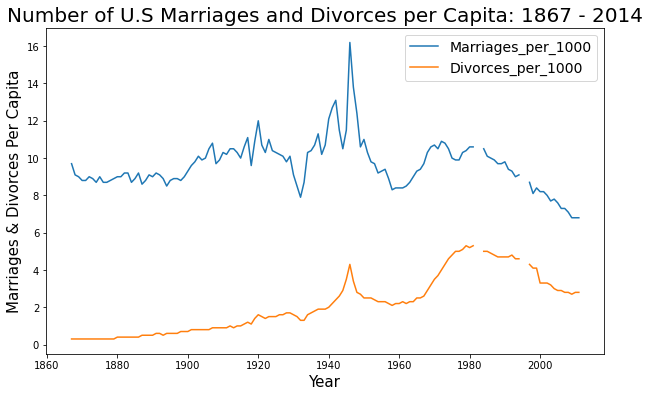

In [16]:
#Importing other libraries
import matplotlib.pyplot as plt
%matplotlib inline

marriages_divorces.plot.line(x = 'Year', y = ['Marriages_per_1000', 'Divorces_per_1000'], figsize = (10,6))

#Labelling the plot and axes

#x-axis
plt.xlabel('Year', fontsize = 15)

#y-axis
plt.ylabel('Marriages & Divorces Per Capita', fontsize = 15)

#Adding the title
plt.title('Number of U.S Marriages and Divorces per Capita: 1867 - 2014', fontsize = 20)

#Showing the legend
plt.legend(prop = dict(size = 14))

plt.show()

# Question 7
#### Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.
#### Don't forget to label your axes!

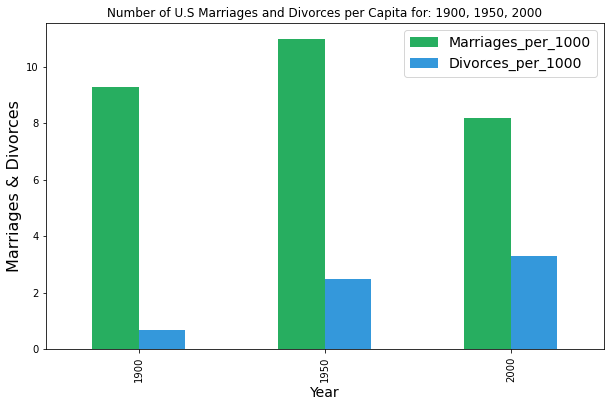

In [17]:
#Importing libraries
import matplotlib.pyplot as plt
%matplotlib inline

#Data needed
marriages_divorces = marriages_divorces[(marriages_divorces.Year == 1900) | (marriages_divorces.Year == 1950) | (marriages_divorces.Year == 2000)]
marriages_divorces = marriages_divorces.drop(columns = ['Marriages', 'Divorces', 'Population'])
marriages_divorces = marriages_divorces.set_index('Year')

marriages_divorces

marriages_divorces.plot.bar(figsize = (10,6), color = {"#3498db", "#27ae60"})

#labelling the chart and axes

#x-axis
plt.xlabel('Year', fontsize = 14)

#y-axis
plt.ylabel('Marriages & Divorces', fontsize = 16)

#Adding the title
plt.title('Number of U.S Marriages and Divorces per Capita for: 1900, 1950, 2000')

#Displaying the legend
plt.legend(prop = dict(size = 14))

plt.show()

# Question 8 
#### Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name. 
#### Don't forget to label your axes!

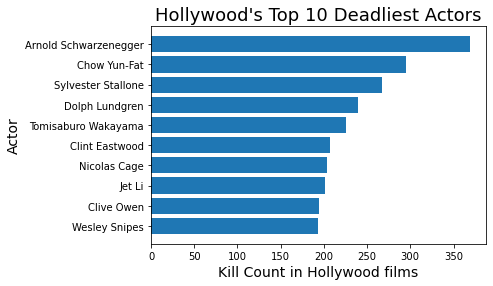

In [79]:
#Importing libraries
import matplotlib.pyplot as plt
%matplotlib inline

#Importing pandas to use the Data Frame
import pandas as pd

#Importing the data into the Data Frame
hollywood_kills = pd.read_csv('actor_kill_counts.csv')
hollywood_kills = hollywood_kills.sort_values(by=['Count'])

#Displaying the title
plt.title("Hollywood's Top 10 Deadliest Actors", fontsize = 18)

#Labelling the chart and axes

#x-axis
plt.ylabel('Actor', fontsize = 14)

#y-axis
plt.xlabel('Kill Count in Hollywood films', fontsize = 14)

plt.barh(hollywood_kills['Actor'], hollywood_kills.Count)

plt.show()

# Question 9
#### Create a pie chart showing the fraction of all Roman Emperors that were assassinated.
#### Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.

In [80]:
#Importing pandas to use the Data Frame
import pandas as pd

#Adding data to the Data Frame
roman_emp = pd.read_csv('roman-emperor-reigns.csv')
roman_emp.head()

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide


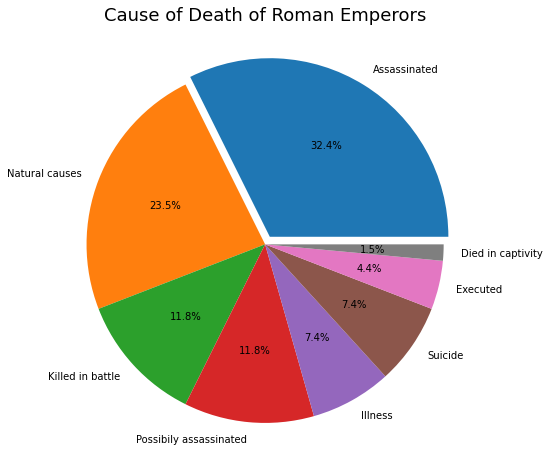

In [84]:
#Importing other libraries
import matplotlib.pyplot as plt
import numpy as np

#Specifying the data
y = np.array([22, 16, 8, 8, 5, 5, 3, 1])
label = ["Assassinated", 'Natural causes', 'Killed in battle', 'Possibily assassinated',
'Illness', 'Suicide','Executed', 'Died in captivity']

#Exploding on "Assassinated"
explode = (0.05, 0, 0, 0, 0, 0, 0, 0)

#Creating the plot
fig1, ax1 = plt.subplots(figsize = (8,8))

#Setting the labels, axes, and title
ax1.axis('equal')
ax1.pie(y, labels = label, autopct = '%1.1f%%', explode = explode)
ax1.set_title('Cause of Death of Roman Emperors', fontsize = 18)

plt.show()

# Question 10
#### Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.
#### Don't forget to label your axes!
#### Color each dot according to its year.

In [85]:
#Importing pandas to use the Data Frame
import pandas as pd

#Importing the csv file and adding it to the Data Frame
arcade_science_phd = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
arcade_science_phd

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948
5,2005,1.435,1129
6,2006,1.601,1453
7,2007,1.654,1656
8,2008,1.803,1787
9,2009,1.734,1611


Text(0, 0.5, 'Total Arcade Revenue (in billions)')

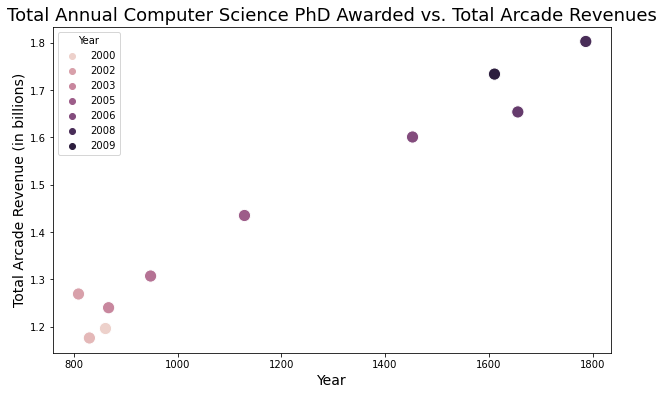

In [91]:
#Importing other libraries
import seaborn as sns
import matplotlib.pyplot as plt

#Increasing the size of the figure
plt.figure(figsize = (10,6))

#Creating the scatter plot, set the title, and increase the size of the data points
sns.scatterplot(x = 'Computer Science Doctorates Awarded (US)', 
                y = 'Total Arcade Revenue (billions)', 
                data = arcade_science_phd, hue = 'Year', s = 150,).set_title('Total Annual Computer Science PhD Awarded vs. Total Arcade Revenues', fontsize = 18)

#Labelling the axes
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Total Arcade Revenue (in billions)', fontsize = 14)